In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
pathresults = "../../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","

import matplotlib.ticker as mtick
import seaborn as sns
viridis = matplotlib.colormaps.get_cmap('viridis')
from matplotlib import colors

so selection:
d by 14C imaging of exudates is usually only 2–3 mm.The rhizosphere extent for most enzymes is 1–3 mm.
so try to respect it for 2mm away from surface.
selection:
5, vhigh co2 for normal cc
44, vhigh co2 and cc
72: low co2 and cc and cs



In [2]:
df3D = pd.read_pickle("./soil3dData.pkl") 

In [3]:
df3D25gotR = df3D[(df3D['gotR'])&(df3D['time'].astype(int)==14)].copy().reset_index()

select cells which are at the bottom: far away from the roots:

In [4]:
df3D_bulk = df3D[(df3D['depth']==min(df3D['depth']))&(df3D['time'].astype(int)==14)&(df3D['cellindx']==0)].copy().reset_index()

In [5]:
dfperirhizo = pd.read_pickle("./dfperrhizal_allcell.pkl") 


In [6]:
dfmean = pd.read_pickle("./allcellupto3mm.pkl") 


In [7]:


#outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
#column_names = outputvalsname + paramsets.columns.tolist()
def getnewval_cell(df):
    #outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
    #column_names = outputvalsname + paramsets.columns.tolist()
    for konzz in ['theta','coa','cod','cca','ccd','css2','co2']:
        df[konzz] = df['partialQ_'+konzz]/df['partial_volume']
    for konzz in ['cs','cl']:
        df[konzz] = df['partialQ_'+konzz+'soil']/df['partialQ_theta']#/df['partial_volume']
    df['vols'] = df['partial_volume']
    df['wat'] = df['partialQ_theta']
    try:
        df['css']=df['css2']
    except:
        pass
    df['cxd']=df['cod']+df['ccd']
    df['cxa']=df['coa']+df['cca']
    df['co'] = df['cod']+df['coa']
    df['cc'] = df['ccd']+df['cca']
    df['cx']=df['co']+df['cc']
    df['cxd_cx']=df['cxd']/df['cx']
    df['cxa_cx']=df['cxa']/df['cx']
    try:
        df['theta']=df['wat']/df['vols']
    except:
        try:
            df['theta']=df['wat']/df['vol']
        except:
            pass
        pass
    #df  = pd.merge(df, paramsets[['pSet', 'theta_th']], on="pSet")
    #df['csBis'] = df['cs']*df['theta']/df['theta_th']
    #df['clBis'] = df['cl']*df['theta']/df['theta_th']
    # per unit of soil volume
    df['cs_'] = df['cs']*df['theta']
    df['cl_'] = df['cl']*df['theta']
    #df.loc[df['scenario'] == "earlyDry",'scenario']="earlyDry"  # Select subset where 'pSet' equals the current value
    
    solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
    solidMolarMass = 60.08e-3 # [kg/mol] 
    thetaS= 0.43
    mgC_per_molC=12.011*1000
    
    massBulkDensity = solidDensity*(1.- thetaS) *1000 /1e6 # [kg/m^3 scv] * [g/kg] * [m3/cm3] = g/cm3
    #df['pSet']=df['scenario']+'_'+df['pSet']

    # mol/cm3 scv to mg C pool/g C mineral
    if False:
        for nnn in ['cs_','cl_','co','cc','coa','cod','cca','ccd','css2']:
            # mol C/cm3 *  
            df[nnn+'_mass'] = df[nnn]*mgC_per_molC / massBulkDensity
    return df
def getnewval(df):
    #outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
    #column_names = outputvalsname + paramsets.columns.tolist()
    try:
        df['css']=df['css2']
    except:
        pass
    df['cxd']=df['cod']+df['ccd']
    df['cxa']=df['coa']+df['cca']
    df['co'] = df['cod']+df['coa']
    df['cc'] = df['ccd']+df['cca']
    df['cx']=df['co']+df['cc']
    df['cxd_cx']=df['cxd']/df['cx']
    df['cxa_cx']=df['cxa']/df['cx']
    try:
        df['theta']=df['wat']/df['vols']
    except:
        try:
            df['theta']=df['wat']/df['vol']
        except:
            pass
        pass
    #df  = pd.merge(df, paramsets[['pSet', 'theta_th']], on="pSet")
    #df['csBis'] = df['cs']*df['theta']/df['theta_th']
    #df['clBis'] = df['cl']*df['theta']/df['theta_th']
    # per unit of soil volume
    df['cs_'] = df['cs']*df['theta']
    df['cl_'] = df['cl']*df['theta']
    #df.loc[df['scenario'] == "earlyDry",'scenario']="earlyDry"  # Select subset where 'pSet' equals the current value
    
    solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
    solidMolarMass = 60.08e-3 # [kg/mol] 
    thetaS= 0.43
    mgC_per_molC=12.011*1000
    
    massBulkDensity = solidDensity*(1.- thetaS) *1000 /1e6 # [kg/m^3 scv] * [g/kg] * [m3/cm3] = g/cm3
    #df['pSet']=df['scenario']+'_'+df['pSet']

    # mol/cm3 scv to mg C pool/g C mineral
    if False:
        for nnn in ['cs_','cl_','co','cc','coa','cod','cca','ccd','css2']:
            # mol C/cm3 *  
            df[nnn+'_mass'] = df[nnn]*mgC_per_molC / massBulkDensity
    return df
df3D_bulk = getnewval(df3D_bulk)
#dfrhizo = getnewval(dfrhizo)
dfmean = getnewval_cell(dfmean)
pSet2Keep =[7,21,47,85]#[17,38,44,85]

In [8]:
#df3D_bulk.loc[df3D_bulk['pSet']==27, val]

NameError: name 'val' is not defined

In [10]:
dfmean = dfmean[dfmean['pSet']!=27].copy()

In [11]:
for val in ['cx','cxa','co','cc','cs','cl']:
    dfmean[val+'_bulk'] = np.nan
    for pp in dfmean['pSet'].unique():#range(99):
        dfmean.loc[dfmean['pSet']==pp, val+'_bulk'] =float( df3D_bulk.loc[df3D_bulk['pSet']==pp, val])


# conditions rhizosphere

# bin: conditions rhizosphere--microorganisms
C1: Co + Cc in [0.04, 1.2] mg C / cm3 soil 
C2: (Co + Cc)

In [12]:
# conditions rhizosphere
# C1
limMBr = np.array([0.04, 1.2])/12*1e-3 # MBr, mol/cm3
#limCoCc
# C2
limMBrMBb =  np.array([1, 2.5]) # MBr/MBb
# C3
limSOCr =  np.array([4, 16])/12*1e-3  # *1/4 # SOCr
# C4
limSOCrb =   np.array([0.66,2]) # SOCr/SOCb
# C5
limMBraMBr =    np.array([6e-4,0.6])
# C6
limcs =    np.array([0,0.55])/12*1e-3 
# C7
limcsRcsB=  np.array([1,np.Inf])
# C8
limMBcorMBcoB =   np.array([1,np.Inf])
# C9
limMBCrMBOr =   np.array([1,np.Inf])

In [13]:
# check c1
print('c1')
errorC1 = set( dfmean[(dfmean['cx'] < limMBr[0])|(dfmean['cx'] > limMBr[1])]['pSet'])
print(repr(errorC1))
print(len(errorC1))
# check c2
print('c2')
errorC2 = set( dfmean[(dfmean['cx']/dfmean['cx_bulk'] < limMBrMBb[0]*0.9
                      )|(dfmean['cx']/dfmean['cx_bulk'] > limMBrMBb[1])]['pSet'])
print(repr(errorC2))
print(len(errorC2))
# check c3
print('c3')
errorC3 = set( dfmean[(dfmean['cs'] +dfmean['cl'] < limSOCr[0]
                      )|(dfmean['cs'] +dfmean['cl'] > limSOCr[1]*1.1)]['pSet'])
print(repr(errorC3))
print(len(errorC3))
# check c4
print('c4')
errorC4 = set( dfmean[((dfmean['cs'] +dfmean['cl'])/(dfmean['cs_bulk'] +dfmean['cl_bulk']) < limSOCrb[0]
                      )|
                      ((dfmean['cs'] +dfmean['cl'])/(dfmean['cs_bulk'] +dfmean['cl_bulk']
                                                    ) > limSOCrb[1]*1.1)]['pSet'])
print(repr(errorC4))
print(len(errorC4))
# check c5
print('c5')
errorC5 = set( dfmean[(dfmean['cxa']/dfmean['cx'] < limMBraMBr[0])|(
    dfmean['cxa']/dfmean['cx'] > limMBraMBr[1])]['pSet'])
print(repr(errorC5))
print(len(errorC5))
# check c6
print('c6')
errorC6 = set( dfmean[(dfmean['cs'] < limcs[0])|(dfmean['cs'] > limcs[1])]['pSet'])
print(repr(errorC6))
print(len(errorC6))
# check c7
print('c7')
errorC7 = set( dfmean[(dfmean['cs'] <dfmean['cs_bulk']*0.9)]['pSet'])
print(repr(errorC7))
print(len(errorC7))
# check c8
print('c8')
errorC8 = set( dfmean[(dfmean['cc']/dfmean['co'] )<(dfmean['cc_bulk']/dfmean['co_bulk']*0.9 )]['pSet'])
print(repr(errorC8))
print(len(errorC8))
# check c9
print('c9')
errorC9 = set( dfmean[(dfmean['co'] > dfmean['cc'])]['pSet'])
print(repr(errorC9))
print(len(errorC9))

errorSets = set.union(errorC1,errorC2,errorC5, errorC6,errorC8,errorC9,errorC7, errorC3, errorC4)#
survivorSets =set.difference( set(dfmean['pSet'].unique()),errorSets)
print('errorsets',len(errorSets), 'survivor',len(survivorSets),survivorSets)

c1
set()
0
c2
{12, 13}
2
c3
{0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22, 23, 29, 30, 34, 35, 36, 39, 40, 42, 43, 46, 47, 48, 51, 53, 54, 55, 57, 59, 60, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73, 74, 78, 80, 82, 83, 84, 85, 86, 87, 89, 90, 91, 93, 94, 95, 97}
64
c4
{58, 6, 8, 11, 45, 14, 18, 50, 21, 24, 56, 88, 92}
13
c5
{65, 36, 39, 9, 14, 15, 48, 50, 20, 24, 91, 28, 29, 63}
14
c6
set()
0
c7
{11, 12, 13, 25, 34, 38, 42, 45, 47, 56, 60, 69, 74, 75, 76, 89, 95, 96, 97}
19
c8
{14}
1
c9
{0, 10, 14, 24, 25, 31, 32, 35, 39, 41, 50, 59, 62, 64, 66, 74, 79, 82, 86, 97, 98}
21
errorsets 86 survivor 12 {33, 68, 37, 5, 72, 44, 77, 49, 81, 52, 26, 61}


In [14]:
list_survivors = list(survivorSets)
list_survivors.sort()
print(repr(list_survivors))

[5, 26, 33, 37, 44, 49, 52, 61, 68, 72, 77, 81]


In [15]:
import string
def bin_(dataframe, independent_variable, dependent_variable, num_bins):
    # Step 1: Define the range of each bin for the independent variable
    #bin_ranges = pd.cut(dataframe[independent_variable], bins=num_bins, include_lowest=True)
    
    #hist, bin_vales = np.histogram(dataframe[independent_variable], bins=num_bins)
    bin_vales = np.linspace(-25,0,num_bins)
    bin_ranges = pd.cut(dataframe[independent_variable], bins=bin_vales)#, include_lowest=True)
    # Step 2: Group the dataframe according to the bin ranges
    dataframe[dependent_variable+"_"]=dataframe[dependent_variable]*dataframe["vol"]
    grouped = dataframe.groupby(bin_ranges)

    # Step 3: Compute the sum of dependent variable for each bin and the mean of the independent variable
    bin_meansZ = grouped[independent_variable].mean()#bin_vales[:-1]+np.diff(bin_vales)# 
    bin_meansX = (grouped[dependent_variable+"_"]).sum()/(grouped["vol"]).sum()
    return bin_meansZ.dropna(), bin_meansX.dropna()
def bin_and_plot(dataframe, independent_variable, dependent_variable, num_bins,
                 nrows, ncols, indexsubplot, unitChange=1.,indexPlot=0,
                 colorlist =None,unit=None, doLogX=False,
                 doLogY=False, colVar = None, mysets=None,keeplim=True,xlabels=None):
    if colVar is not None:
        maxV = dataframe[colVar].max()
        minV = dataframe[colVar].min()
        
    # Create the plot
    #plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.subplot(nrows, ncols, indexsubplot)
    # Loop to plot each line
    allsets = dataframe["pSet"].unique()
    #print('ames',max( dataframe[dataframe['pSet'] in np.array(mysets)][dependent_variable]))
    for i in allsets:
        df_ = dataframe[dataframe['pSet']==i].copy()
        bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, 
                                      num_bins)
        plt.plot( bin_meansX.values*unitChange, bin_meansZ,c='k')
    pset2name = {5:"highCO2",44:"highMB",61:"highSolutes"}
    if mysets is not None:
        for iid, i in enumerate(mysets):
            df_ = dataframe[dataframe['pSet']==i].copy()
            bin_meansZ, bin_meansX = bin_(df_, independent_variable, dependent_variable, 
                                          num_bins)
            if colorlist is not None:
                cc = colorlist[iid]
                plt.plot( bin_meansX.values*unitChange, bin_meansZ,label=f'{pset2name[i]}',
                         linewidth=7.0, 
                         c= cc)
            else:
                plt.plot( bin_meansX.values*unitChange, bin_meansZ,label=f'{pset2name[i]}',
                         linewidth=7.0)
            
    if unit is None:
        unit = 'mol/cm3'
    if keeplim == True:
        plt.xlim(np.min(dataframe[dependent_variable])*0.95*unitChange, 
                 np.max(dataframe[dependent_variable])*1.05*unitChange)
    
    plt.yticks(fontsize=18)
    

    if indexPlot%2 != 0:
        plt.gca().set_yticklabels([])
    else:
        plt.ylabel('Mean depth (cm)', fontsize=20)
    # Get the corresponding letter label
    label = string.ascii_uppercase[indexPlot]
    plt.gca().annotate(
            label,
            xy=(0, 1.07), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize='20', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1.', edgecolor='none', pad=3.0))
    
    if xlabels is None:
        plt.xlabel('Mean ' + dependent_variable+' ('+unit+')', fontsize=20)
    else:
        
        plt.xlabel('Mean ' + xlabels[dependent_variable]+' ('+unit+')', fontsize=20)
    plt.xticks(fontsize=18)
    if unitChange <= 1:
        plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
        plt.xticks(rotation=30, fontsize=18)
    if doLogY:
        plt.yscale('log')
    if doLogX:
        plt.xscale('log')
        
    plt.grid(True)
    
    plt.tight_layout()
import matplotlib.colors as mcolors
# Define a list of 17 distinct colors
#colors = [
#    "#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231",
#    "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe",
#    "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000",
#    "#aaffc3", "#808000"
#]
colors =["#66c2a5","#fc8d62","#8da0cb"]
# Create a ListedColormap using the defined colors
cmap = mcolors.ListedColormap(colors)

# Create a scalar mappable for displaying the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=16))

colvars =None# 'CS_init'
df3D25gotR['vol']=df3D25gotR['volscv']
idsplot = [1,2,3,4]
dftemp = df3D25gotR[np.array([ii  in survivorSets for ii in list(df3D25gotR['pSet'])])]
units = [ '$\mu mol~C/cm^3$ water','$\mu mol~C/cm^3$ water','$\mu mol~C/cm^3$ soil','$\mu mol~C/cm^3$ soil']
xlabels = {'cs': '$C_L^l$','cl':'$C_H^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }

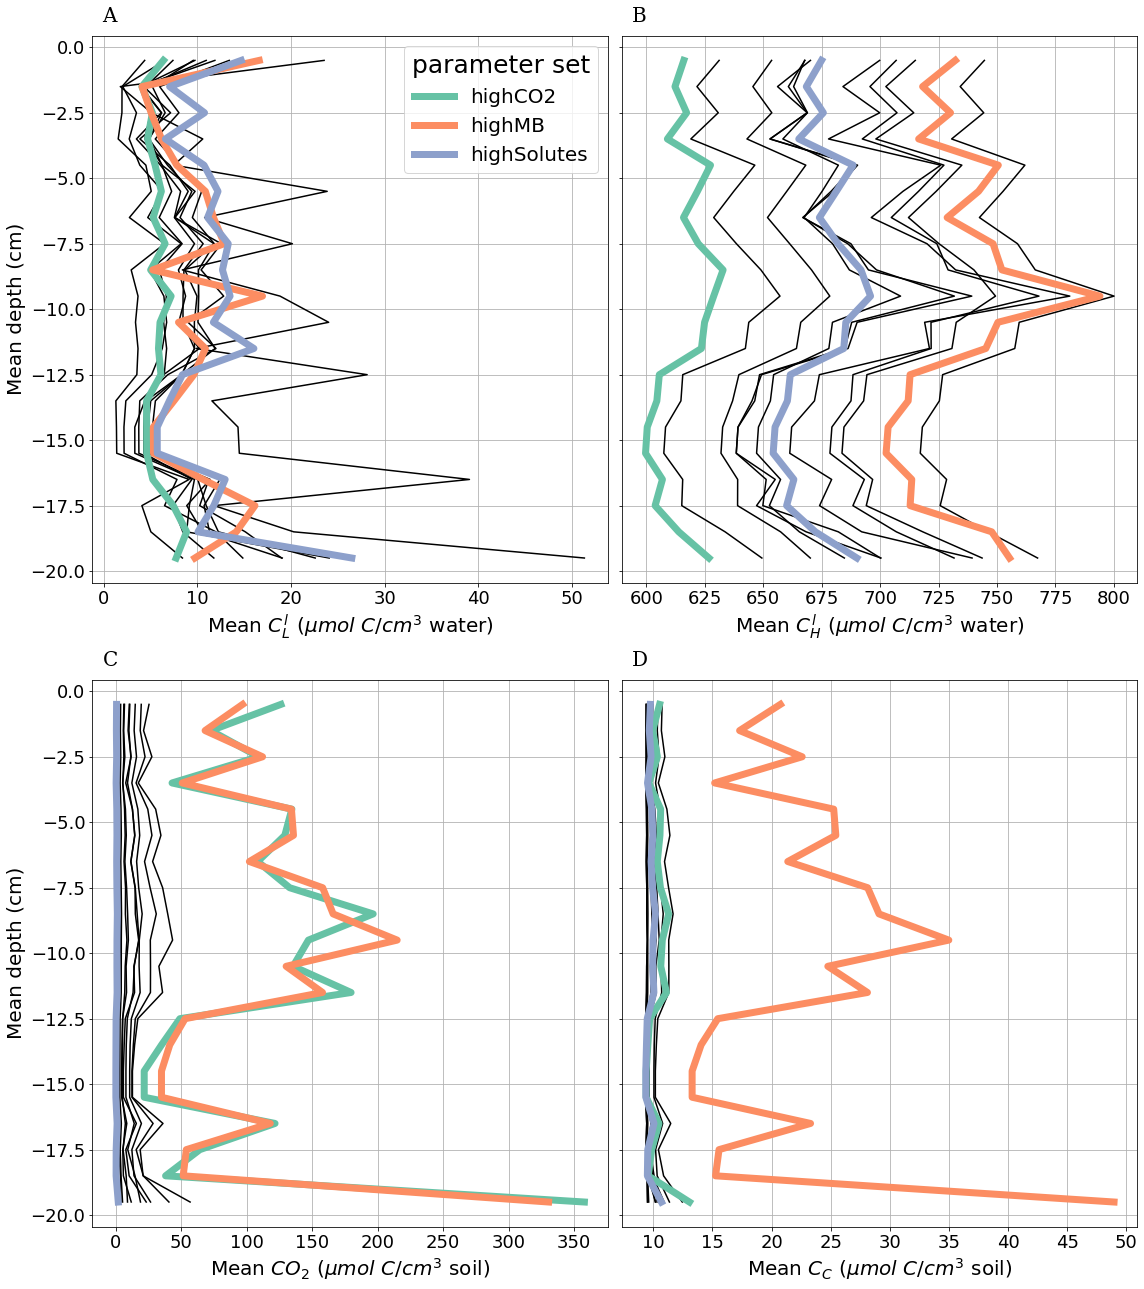

In [16]:
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs','cl','co2','cc']): #(['CHl','css','cs_/css']):
    bin_and_plot(dftemp, 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 indexPlot =nn,
                 colVar= colvars, unitChange=1e6,
                 unit = units[nn],keeplim=False,
                xlabels=xlabels,colorlist = colors,
                mysets=[5,44,61]#list_survivors
                )#[nn])
    if nn == 0:
        plt.legend(fontsize=20,title_fontsize='25', title='parameter set')  
plt.savefig('./depthvs2d99set.png')
plt.show()

In [1]:

  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs','cl','co2','cc']): #(['CHl','css','cs_/css']):
    bin_and_plot(dftemp, 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 doLogX=True, 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False,
                xlabels=xlabels,colorlist = colors,
                mysets=list_survivors
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99setlog.png')
plt.show()

NameError: name 'plt' is not defined

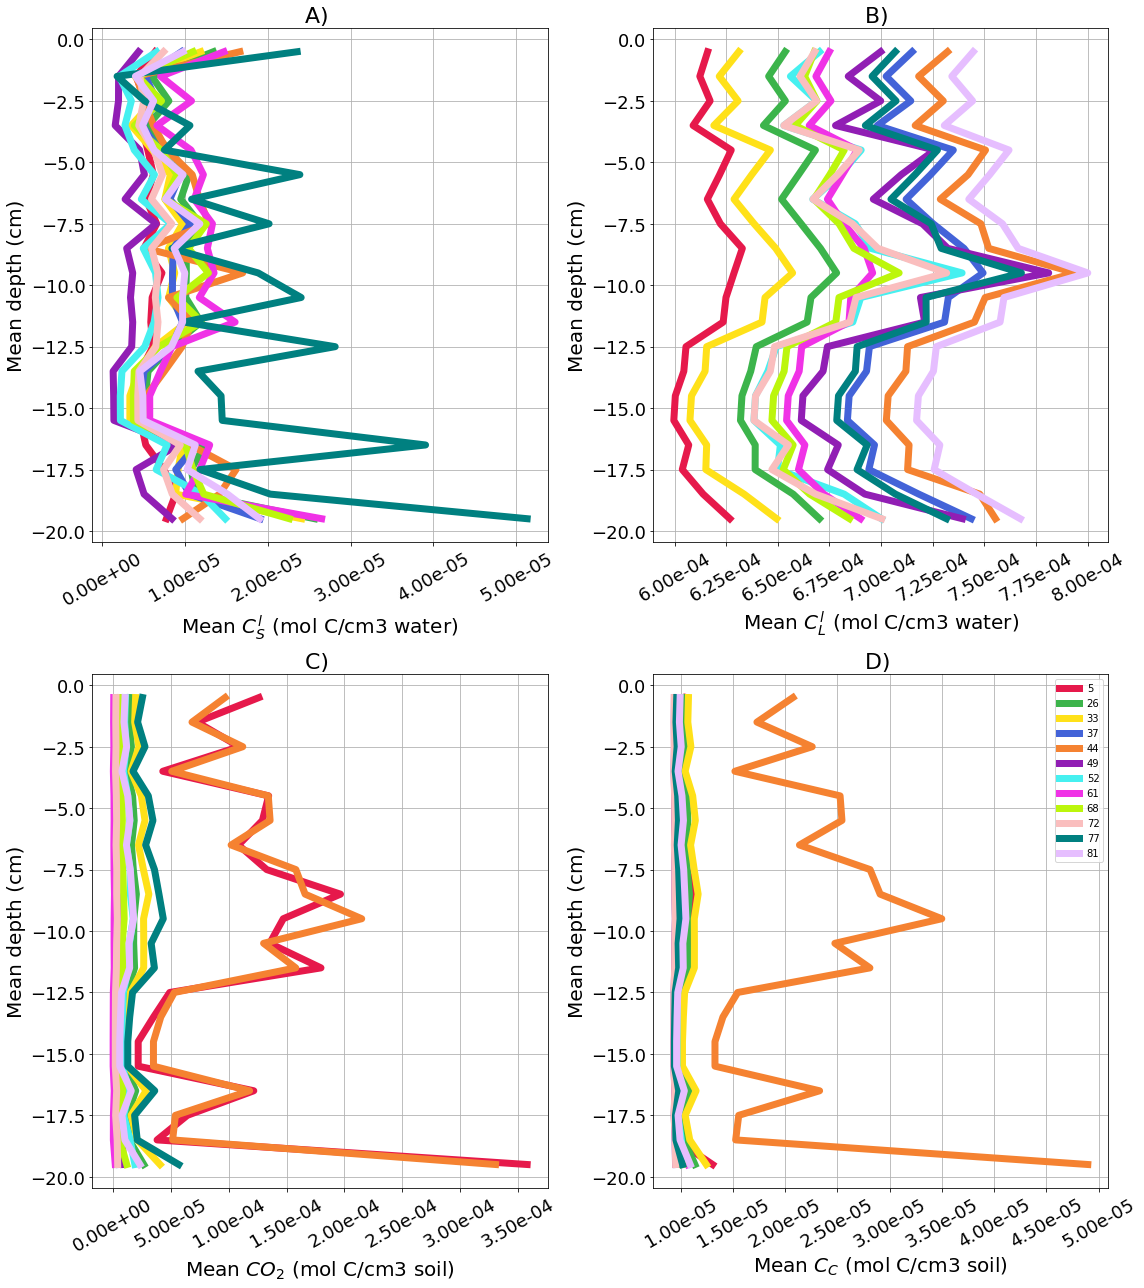

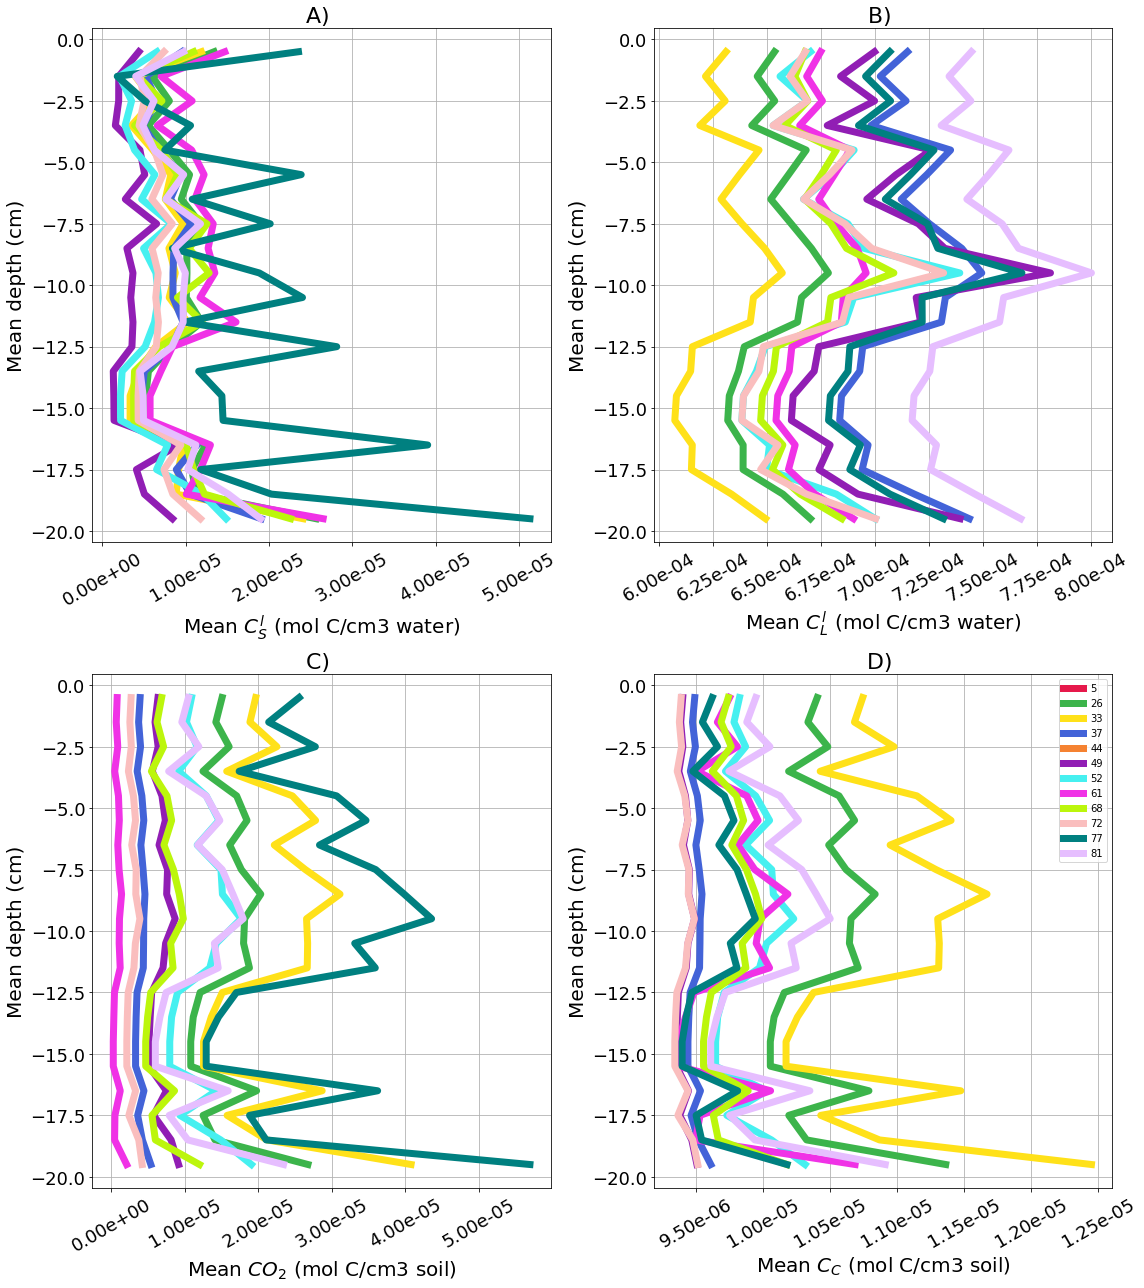

In [54]:

units = [ 'mol C/cm3 water','mol C/cm3 water','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cs': '$C_S^l$','cl': '$C_L^l$','co2': '$CO_2$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs','cl','co2','cc']): #(['CHl','css','cs_/css']):
    bin_and_plot(dftemp[(dftemp['pSet']!= 44)&(dftemp['pSet']!= 5)].copy(), 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False,
                xlabels=xlabels,colorlist = colors,
                mysets=list_survivors
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set.png')
plt.show()

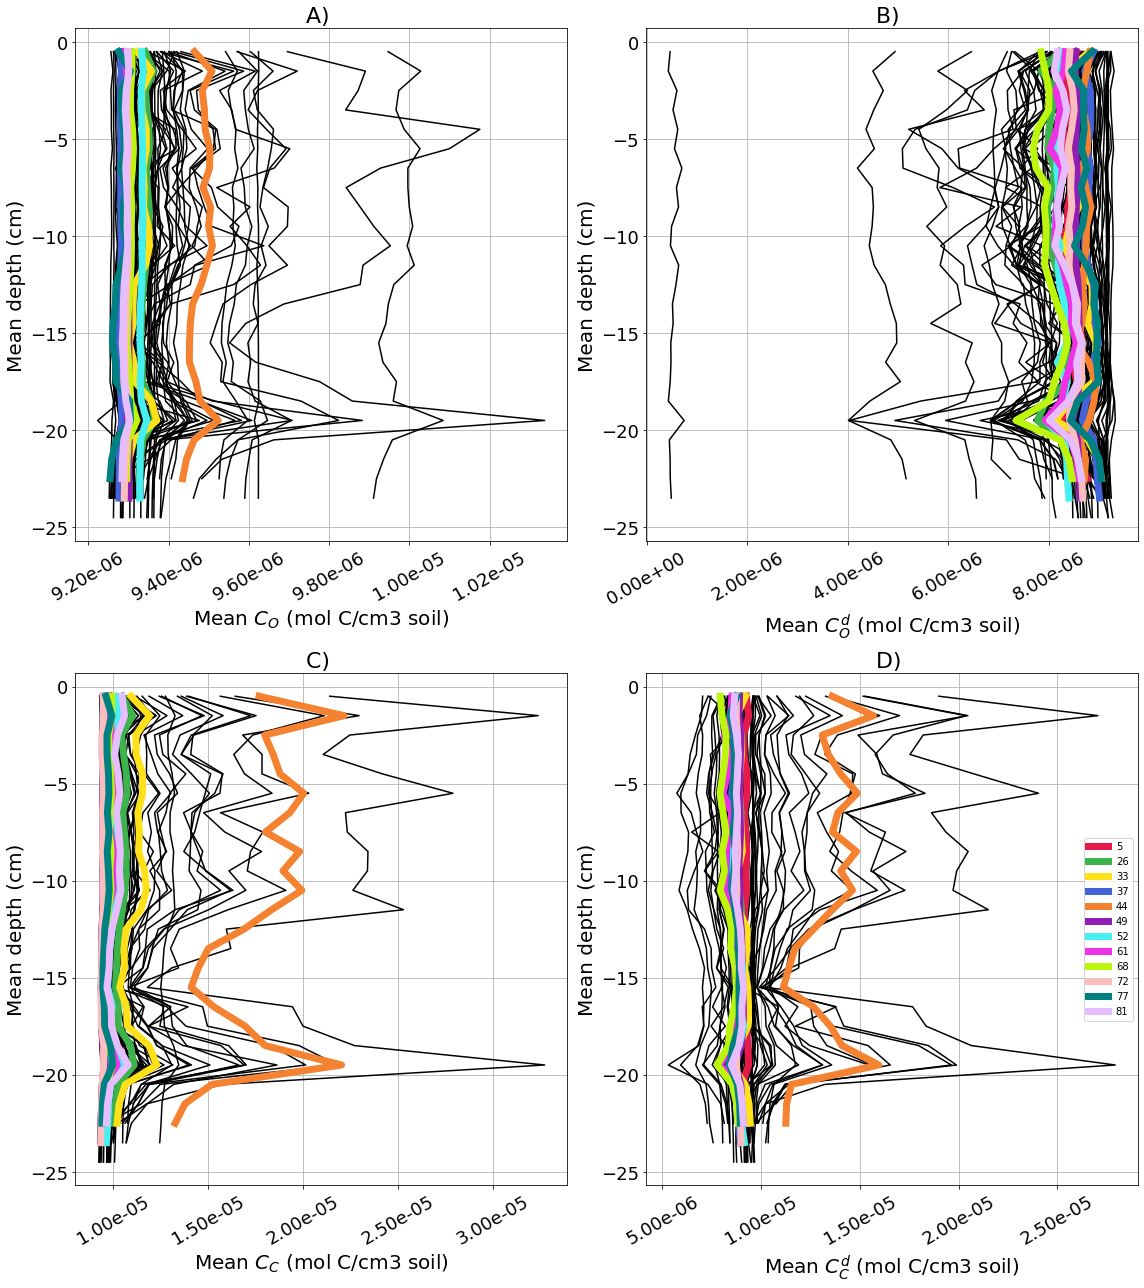

In [57]:
dftemp = df3D25gotR[np.array([ii  in survivorSets for ii in list(df3D25gotR['pSet'])])]
idsplot = [1,2,3,4]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cod': '$C_O^d$','ccd': '$C_C^d$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['co','cod','cc','ccd']): #(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(df3D25gotR, 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 colVar= None, 
                 unit = units[nn],keeplim=False,colorlist = colors,
                xlabels=xlabels,mysets=list_survivors
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set2.png')
plt.show()

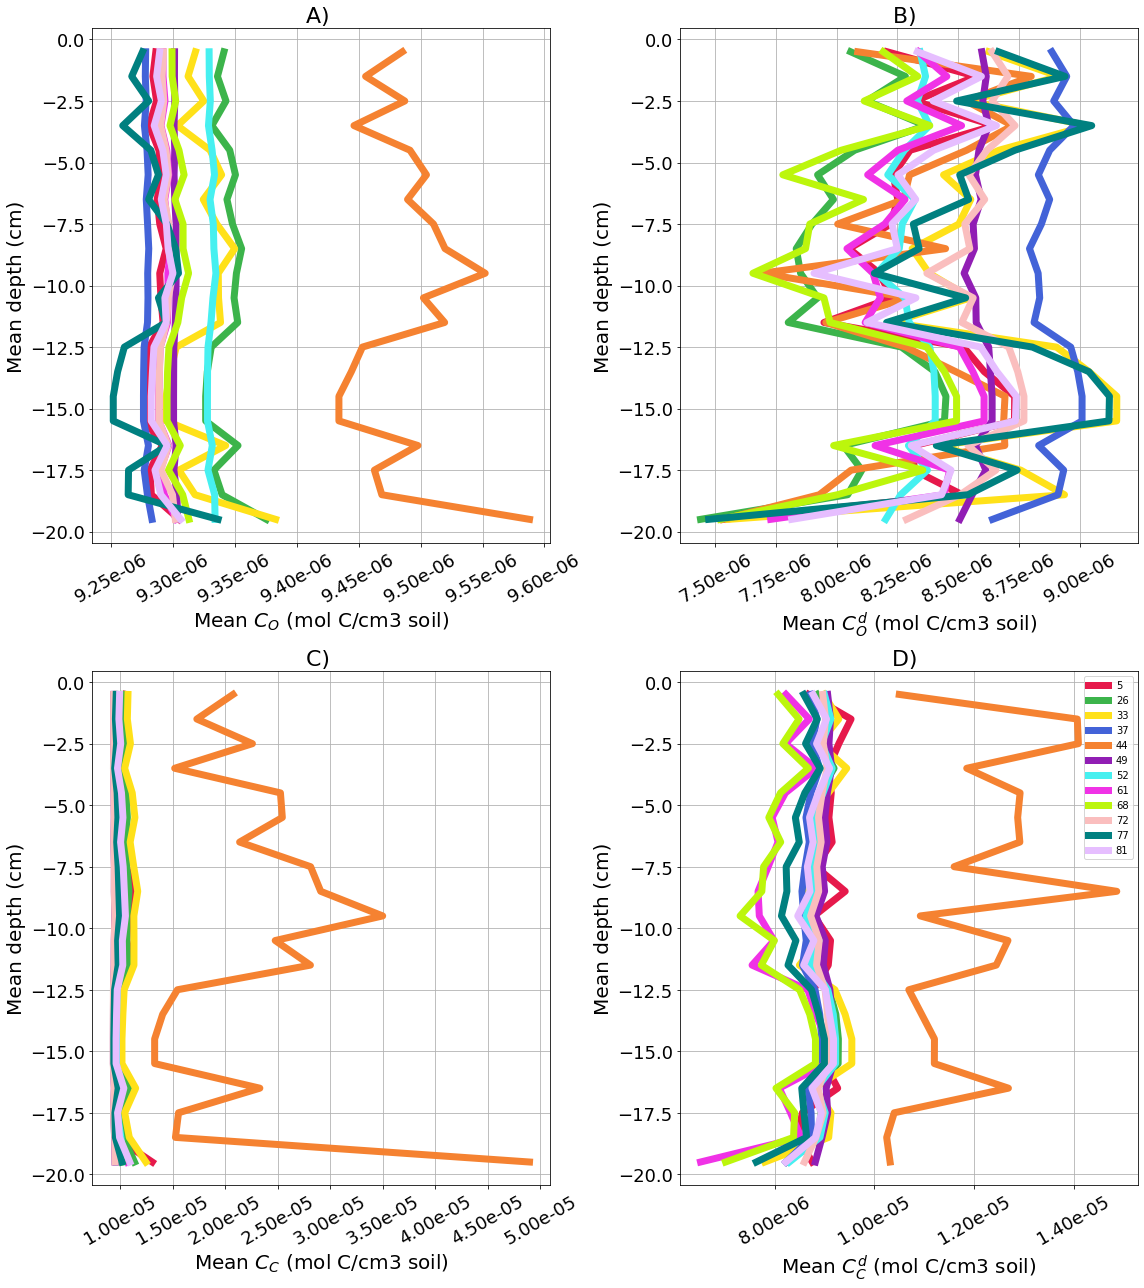

In [49]:

idsplot = [1,2,3,4]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil','mol C/cm3 soil']
xlabels = {'cod': '$C_O^d$','ccd': '$C_C^d$','cc': '$C_C$','co': '$C_O$' }  
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['co','cod','cc','ccd']): #(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(dftemp, 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 #doLogX=True, 
                 colVar= None, 
                 unit = units[nn],keeplim=False,colorlist = colors,
                xlabels=xlabels,mysets=list_survivors
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set2.png')
plt.show()

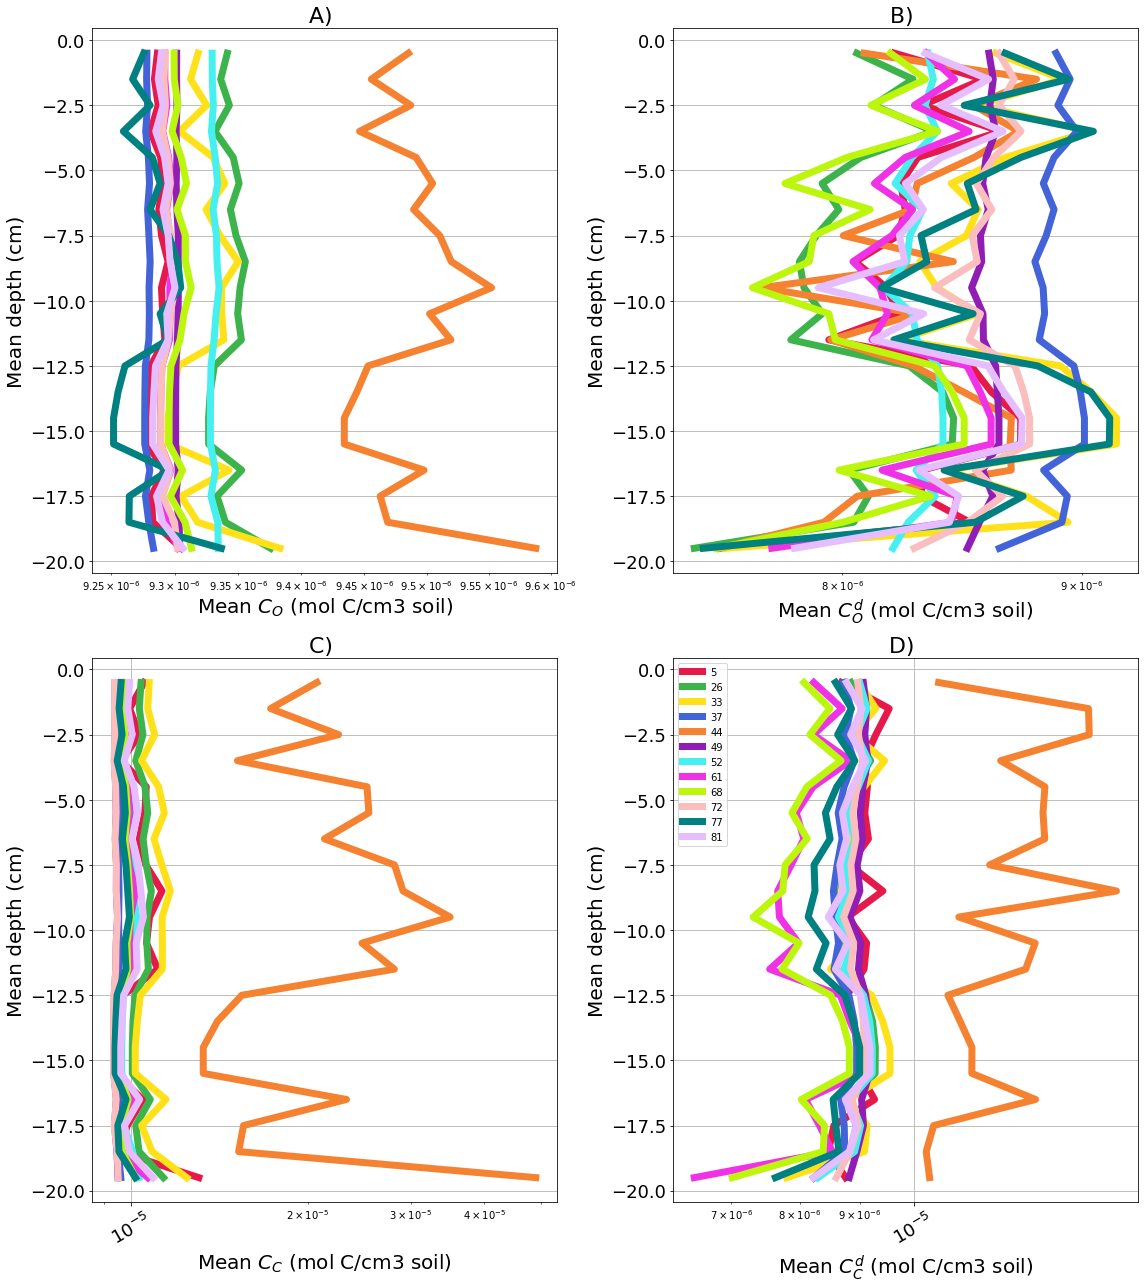

In [50]:
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['co','cod','cc','ccd']): #(['CLl','co2','cc','co']): #(['CHl','css','cs_/css']):
    bin_and_plot(dftemp, 'depth', dep, 50,
                2,2, idsplot[nn],  doLogY=False, 
                 doLogX=True, 
                 colVar= None, 
                 unit = units[nn],keeplim=False,colorlist = colors,
                xlabels=xlabels,mysets=list_survivors
                )#[nn])
plt.legend()  
plt.savefig('depthvs2d99set2log.png')
plt.show()

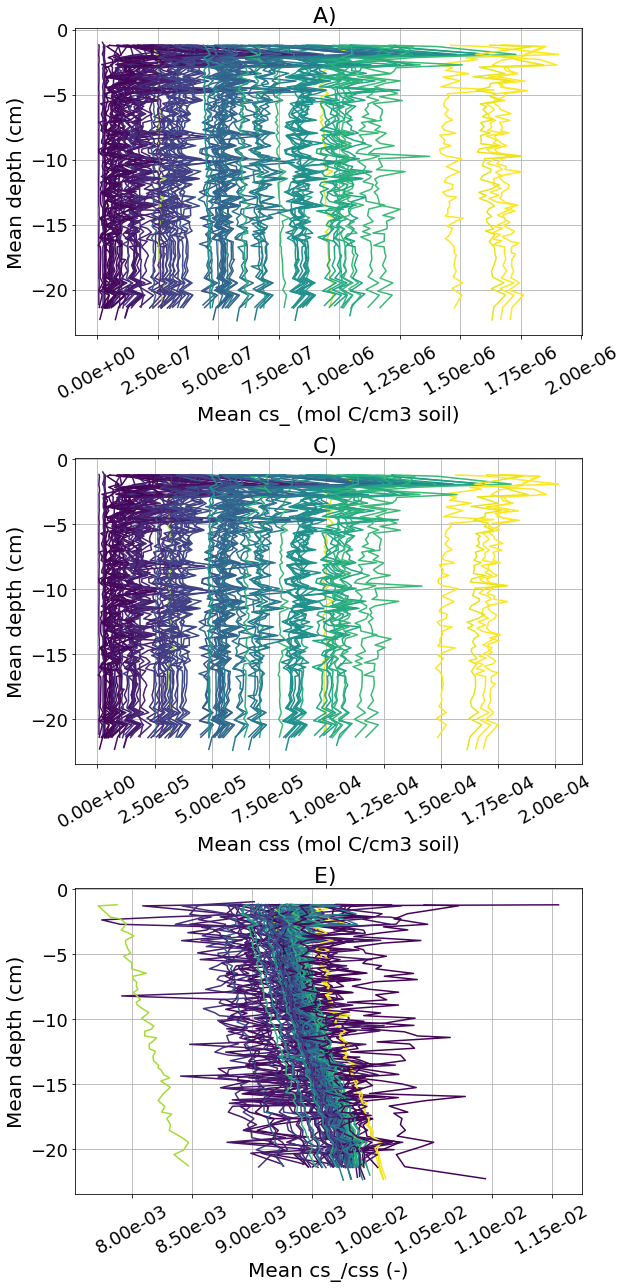

In [35]:
colvars = 'CS_init'
dfa['height'] = dfa['yZ']
mg_per_mol = 12.011 *1000 # g/mol

solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
solidMolarMass = 60.08e-3 # [kg/mol] 

# theta_r, theta_s, alpha, n, Ks
soil =  [0.08, 0.43, 0.04, 1.6, 50]#[0.045, np.nan, 0.04, 1.6, 50]

# [mol / m3 solid] =[kg/m^3 solid] / [kg/mol] 
solidMolDensity = solidDensity/solidMolarMass
# [mol / m3 scv] = [mol / m3 solid] * [m3 solid /m3 space]
bulkDensity_m3 = solidMolDensity*(1.- soil[1])
bulkDensity_cm3 = bulkDensity_m3 / 1e6 # [mol / cm3 scv] 
# g soil/cm3 soil
solidDensity_gcm3 = solidDensity/1e6*1000 # [kg/m^3 solid] * [m3/cm3] * [g/kg]

#dfa['cs_'] = dfa['cs']*dfa['theta']*mg_per_mol/solidDensity_gcm3
dfa['cl_'] = dfa['cl']*dfa['theta']#*mg_per_mol/solidDensity_gcm3
dfa['css'] = dfa['css2']#*mg_per_mol/solidDensity_gcm3
#dfa['cs_/css']=dfa['cs_']/dfa['css']
idsplot = [1,3,5]
units = [ 'mol C/cm3 soil','mol C/cm3 soil','-']
plt.figure(figsize=(8*2, 6*3))
for nn, dep in enumerate(['cs_','css','cs_/css']):
    bin_and_plot(dfa, 'height', dep, 100,
                 3, 2, idsplot[nn], 
                 colVar= colvars, 
                 unit = units[nn],keeplim=False)#[nn])
    

plt.show()

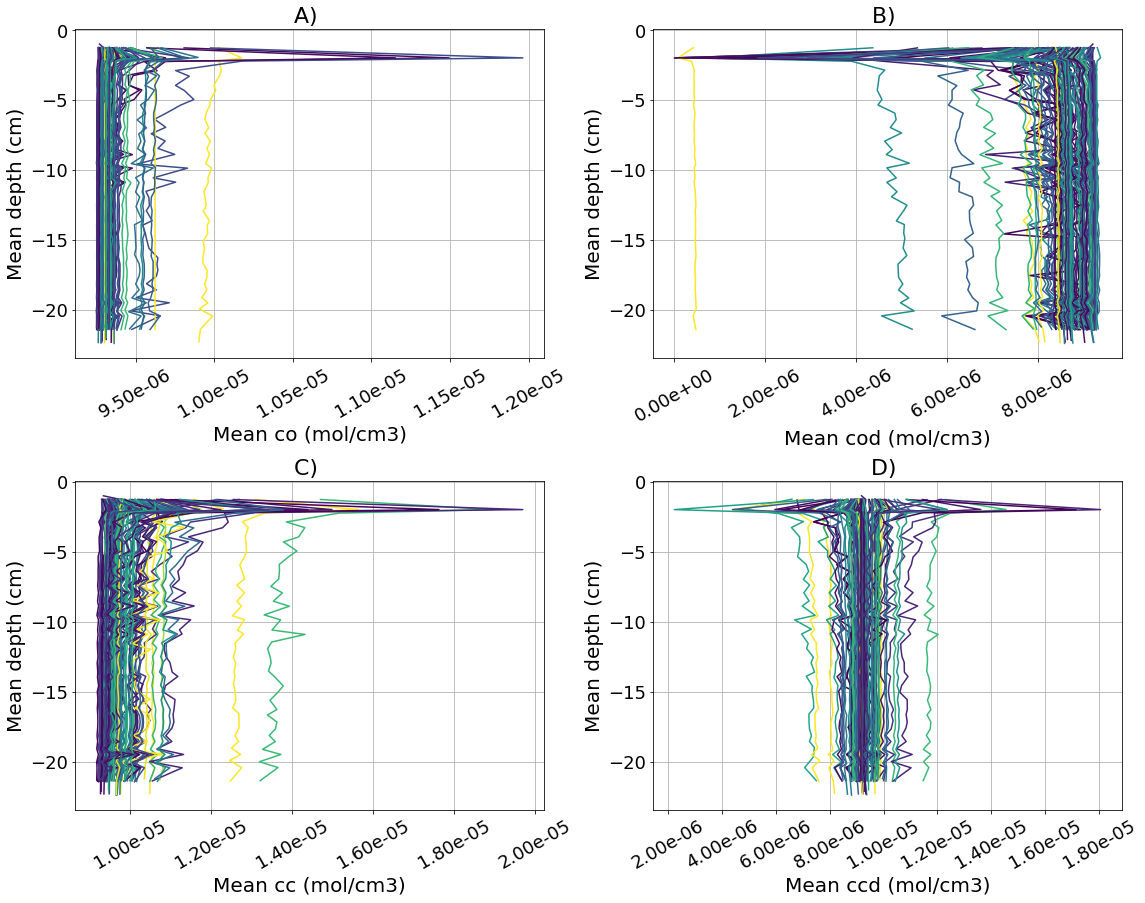

In [36]:
colvars = 'CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co','cod','cc','ccd']):
    bin_and_plot(dfa, 'height', dep, 50,
                 4, 2, idsplot[nn], keeplim=False,
                 colVar= colvars)#[nn])
    

plt.show()

KeyError: 'height'

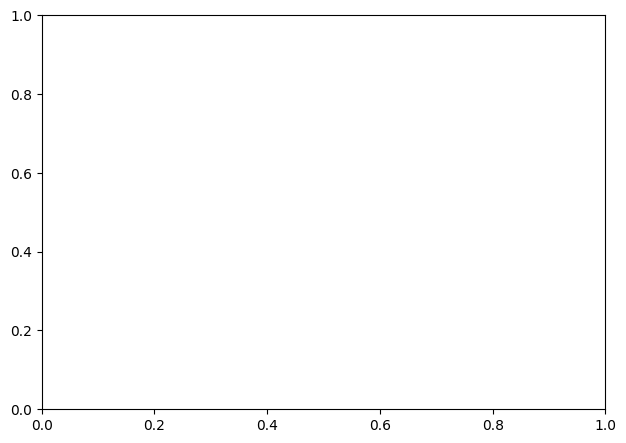

In [336]:
colvars = None#'CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co','cod','cc','ccd']):
    bin_and_plot(dfa, 'height', dep, 50,
                 4, 2, idsplot[nn], keeplim=False,
                 mysets=[17,38,44,85],#pSet2Keep,
                 colVar= colvars
                )#[nn])
    

plt.show()

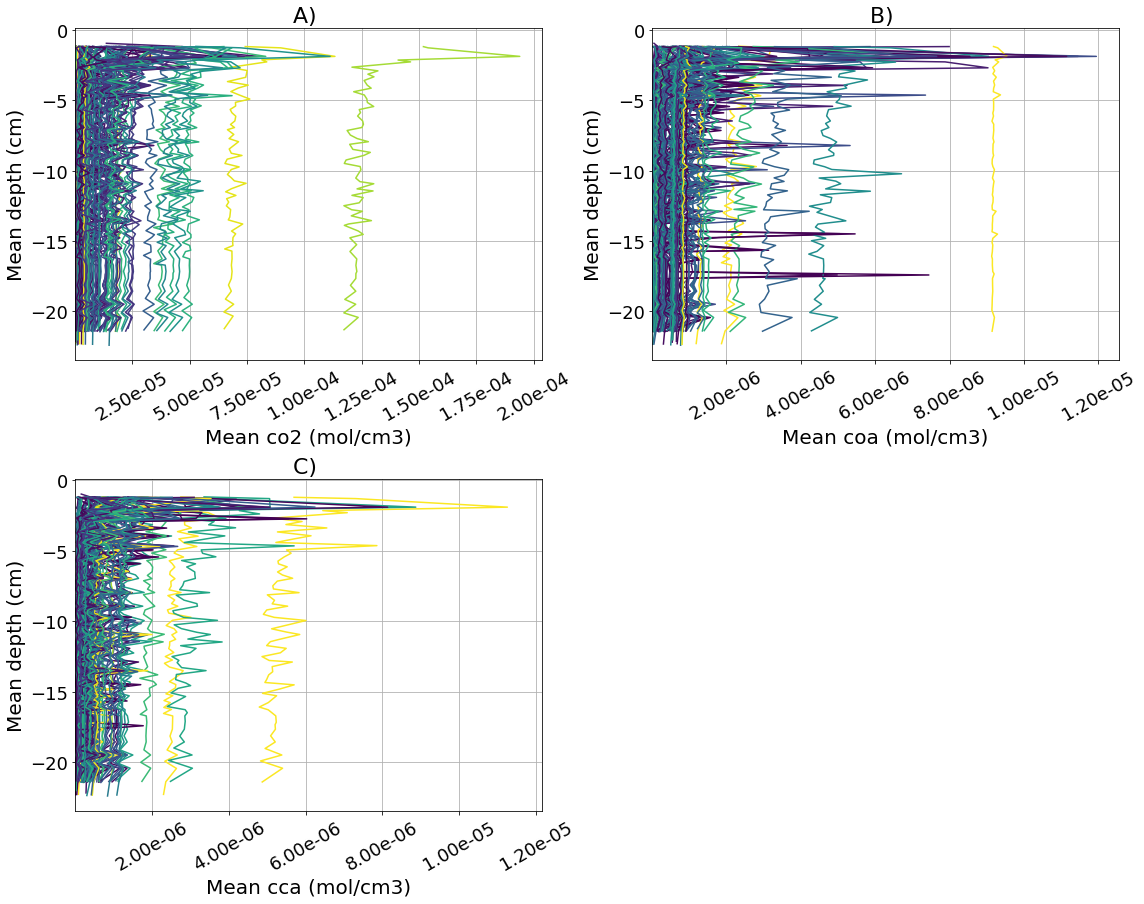

In [38]:
colvars ='CS_init'

idsplot = [1,2,3,4]
plt.figure(figsize=(8*2, 6*4))
for nn, dep in enumerate(['co2','coa','cca']):
    bin_and_plot(dfa, 'height', dep, 100,
                 4, 2, idsplot[nn],
                 colVar= colvars)#[nn])
    

plt.show()

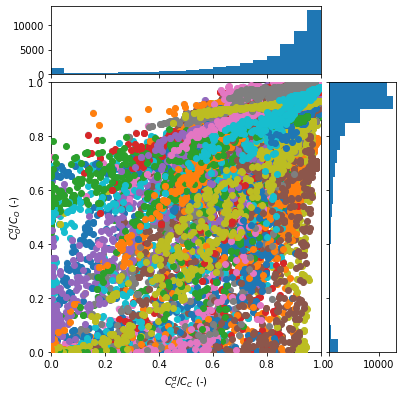

In [14]:
def scatter_hist(x, y,sets, ax, ax_histx, ax_histy,extra_val=None):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    
    ax.scatter(x, y,
               #c=df['vol'],
               alpha=0.3, edgecolors ='none')
 
    for vall in extra_val:#pSet2Keep:
        is5x = x[np.where(sets == vall)[0] ] # Select subset where 'pSet' equals the current value
        is5y = y[np.where(sets == vall)[0] ] # Select subset where 'pSet' equals the current value
        col = (0.0, 0.0, 0.0)
        ax.scatter(is5x, is5y, alpha=1, 
                    zorder=100,label=f'{vall}'#color_map[value]
                   )
    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth
    #ax.legend( bbox_to_anchor=(1.7, 1))
    bins = np.arange(-lim, lim + binwidth, binwidth)
    
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
# Start with a square Figure.


fig = plt.figure(figsize=(6, 6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])

ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#plt.title(chr(ord('@')+2)+") ")
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax.set_xlabel('$C_C^d/C_C$ (-)')
ax.set_ylabel('$C_O^d/C_O$ (-)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# Draw the scatter plot and marginals.
scatter_hist((dfa['ccd'])/dfa['cc'],(dfa['cod'])/dfa['co'], 
             dfa['pSet'], ax, ax_histx, 
             ax_histy,df["pSet"].unique())


[]

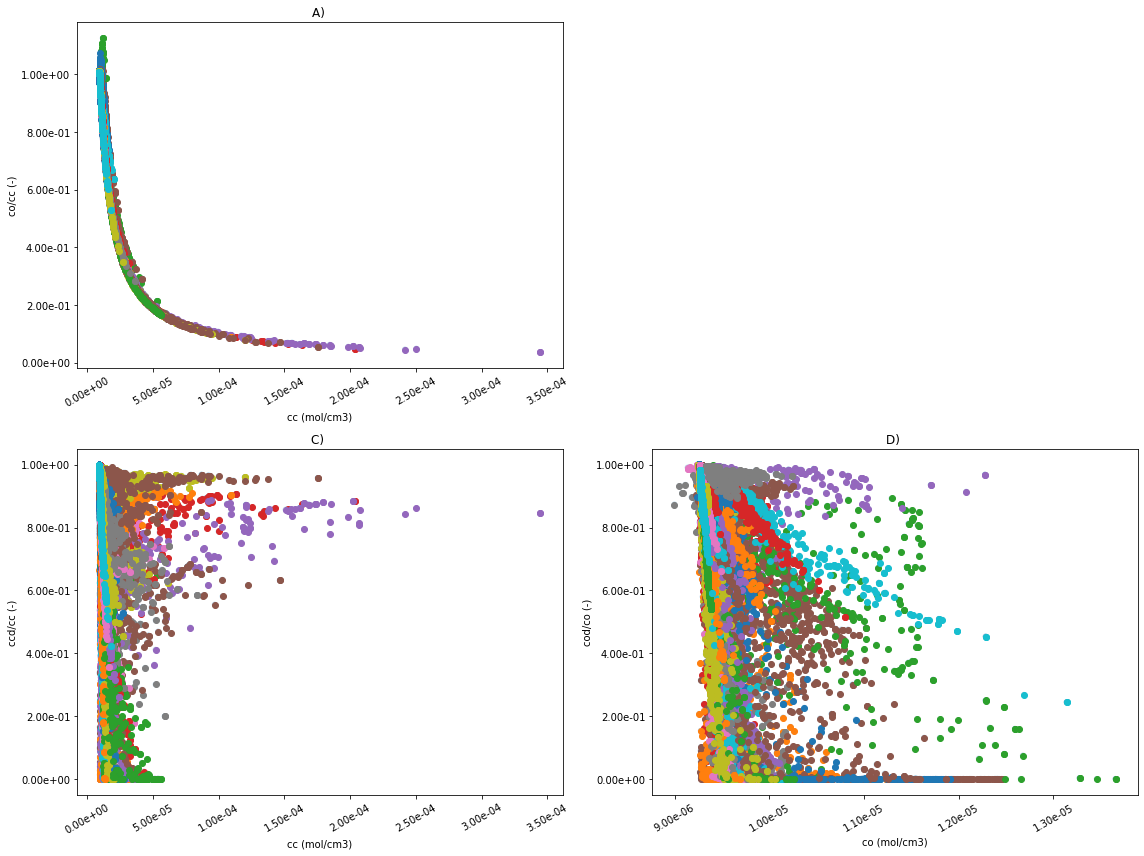

In [15]:
pSet2Keep = df["pSet"].unique()


plt.figure(figsize=(8*2, 6*2))
plt.subplot(2, 2, 1)
plt.title(chr(ord('@')+1)+") ")#+colVar)

df=dfa
plt.scatter((df['cc']),(df['co'])/df['cc'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    plt.scatter((subset['cc']),(subset['co'])/subset['cc'], alpha=1, 
                zorder=100,label=f'{vall}'
               )
    ##plt.legend()
    
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('cc (mol/cm3)')
plt.ylabel('co/cc (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)


plt.subplot(2, 2, 3)
plt.title(chr(ord('@')+3)+") ")#+colVar)
plt.scatter((df['cc']),(df['ccd'])/df['cc'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    
    plt.scatter((subset['cc']),(subset['ccd'])/subset['cc'], alpha=1, 
                zorder=100,label=f'{vall}'
               )
    ##plt.legend()
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('cc (mol/cm3)')
plt.ylabel('ccd/cc (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)

#plt.legend()
plt.subplot(2, 2, 4)
plt.title(chr(ord('@')+4)+") ")#+colVar)

plt.scatter((df['co']),(df['cod'])/df['co'], #np.log(df['cc']),np.log(df['co']), 
            #c=df['pSet'],
            alpha=0.3, edgecolors ='none')
for vall in pSet2Keep:
    subset = df[df['pSet'] == vall]  # Select subset where 'pSet' equals the current value
    plt.scatter((subset['co']),(subset['cod'])/subset['co'], alpha=1, 
               zorder=100,label=f'{vall}'
               )
    ##plt.legend()
    
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
#plt.title(nn)
#plt.colorbar()
plt.xlabel('co (mol/cm3)')
plt.ylabel('cod/co (-)')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.xticks(rotation=30)

plt.tight_layout()
plt.plot()

In [41]:
print(len(set( df['pSet'].unique())-psetCaCxa),
len(set( df['pSet'].unique())- psetCaCxa-pSethighCoCc))

90 90


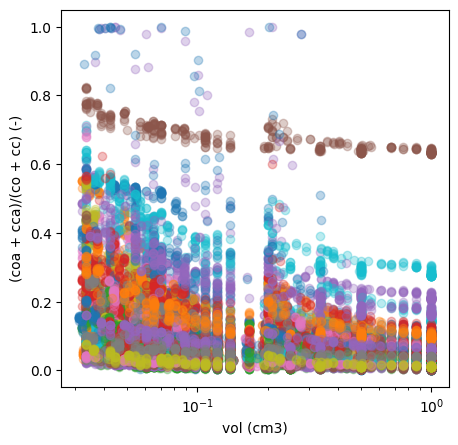

In [42]:
df = dfa
unique_values =set( df['pSet'].unique())#-psetCaCxa
#unique_values.add(57)
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    #col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cxa']/subset['cx'], alpha=0.3, 
               label=str(value)#, c = col
               )#color_map[value])

# Add labels and legend
plt.xscale('log')
plt.xlabel('vol (cm3)')
plt.ylabel('(coa + cca)/(co + cc) (-)')
##plt.legend(ncol=2, bbox_to_anchor=(1.02, 1))
plt.show()

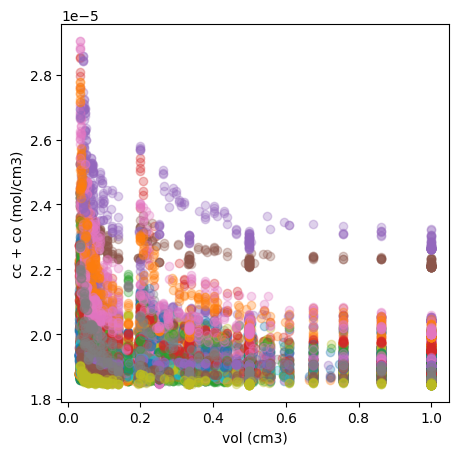

In [43]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cc'] + subset['co'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cc + co (mol/cm3)')
##plt.legend(ncol=2)
plt.show()

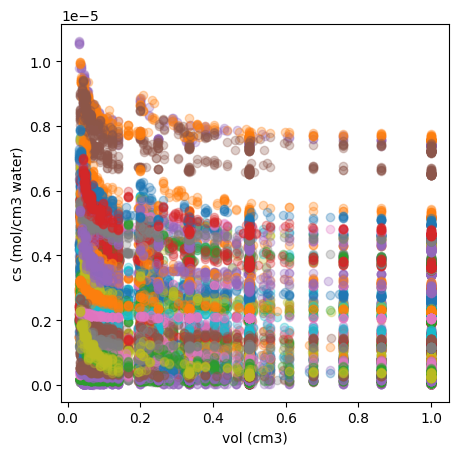

In [44]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs (mol/cm3 water)')
##plt.legend(ncol=2)

plt.show()

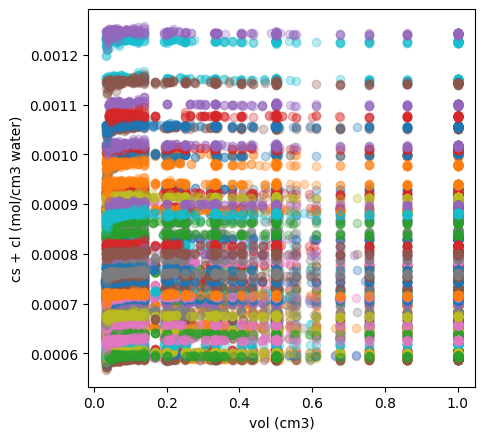

In [45]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs']+subset['cl'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs + cl (mol/cm3 water)')
##plt.legend(ncol=3)
plt.show()


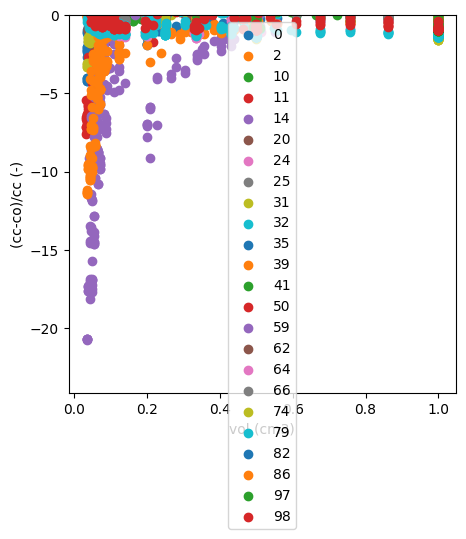

In [46]:

df=dfa#[]
unique_values =pSethighCoCcBis
#- psetCaCxa-pSethighCoCc-pSethighC-pSethighCoCcBis
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value].copy()  # Select subset where 'pSet' equals the current value
    subset['cc-co']= subset['cc']-subset['co']
    mehrCo = subset[subset['cc-co']<0]
    col = colors.to_hex(color_map[value])
    #print('pset',value, min(subset['cc-co']/subset['cc']))
    plt.scatter(subset['vol'], subset['cc-co']/subset['cc']*100, #alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])

# Add labels and legend
plt.ylim(top=0)
plt.xlabel('vol (cm3)')
plt.ylabel('(cc-co)/cc (-)')
plt.legend()
plt.show()


In [47]:
len(set( df['pSet'].unique())- set(psetCaCxa)-set(pSethighCoCc)-set(pSetLowCoCc)-set(pSethighC)-set(pSethighCoCcBis))

70

In [48]:
psetCaCxa

{9, 14, 15, 24, 29, 36, 39, 43, 50}

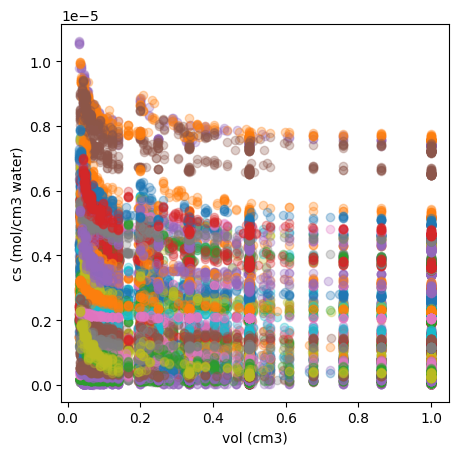

In [49]:
df=dfa
unique_values = set( df['pSet'].unique())#- psetCaCxa-pSethighCoCc-pSethighC-pSethighCoCcBis
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    col = colors.to_hex(color_map[value])
    plt.scatter(subset['vol'], subset['cs'], alpha=0.3,  
                label=str(value)#c = col
               )#color_map[value])


# Add labels and legend
plt.xlabel('vol (cm3)')
plt.ylabel('cs (mol/cm3 water)')
##plt.legend(ncol=2)

plt.show()

NameError: name 'randrange' is not defined

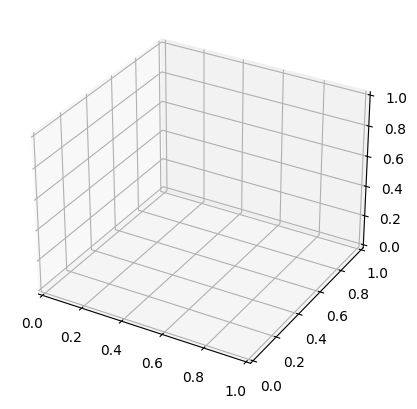

In [50]:
df = dfa
unique_values = set( df['pSet'].unique())#
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
unique_values = unique_values #- set([57,74])#.add(57)
rgb_values = sns.color_palette("Set2", len(unique_values))
color_map = dict(zip(unique_values,rgb_values))

df['cs_/css']=df['cs_']/df['css']
for value in unique_values:
    subset = dfa[dfa['pSet'] == value].copy()  # Select subset where 'pSet' equals the current value
    subset['cc-co']= subset['cc']-subset['co']
    print(value,np.mean(subset['cxa_cx']),np.max(subset['cxa_cx']), 
          np.mean(subset['cs_/css']), np.mean(subset['cs']))

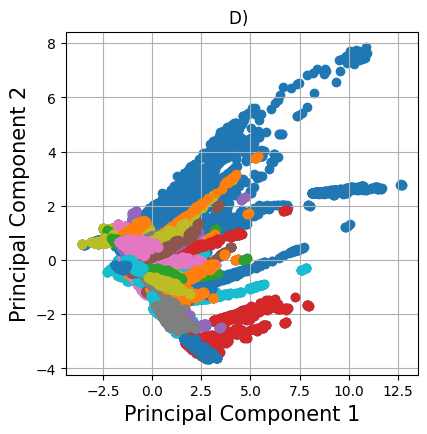

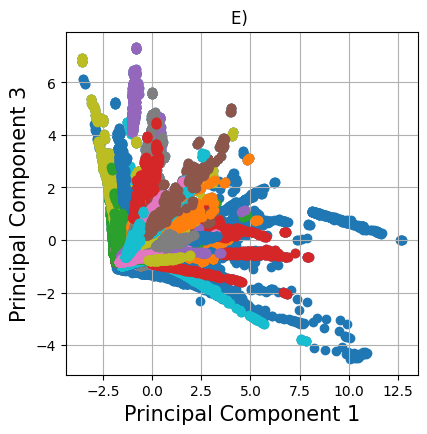

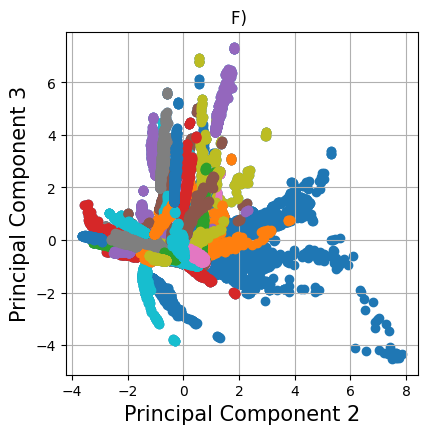

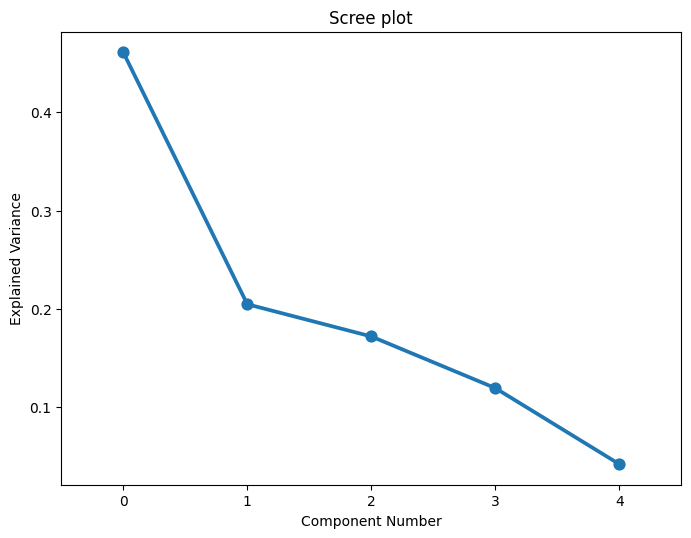

In [308]:
import matplotlib.ticker as mtick
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.markers as markers

import matplotlib.markers as markers

# Get a list of all available markers
marker_list = list(markers.MarkerStyle.markers.keys())

outputvalsname =  ['cs','coa','cod','cca','ccd','co2','css2']# 'co','cc',#'cl',
takeOut =[]


selectedSets = (set( df['pSet'].unique())-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

# Separating out the features
x = dfa[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

#for pset in range(99):

#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    #plt.legend()
        
ax.set_title(chr(ord('@')+4)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,2)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

#for pset in range(99):
#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 3']

           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    #plt.legend()
        
ax.set_title(chr(ord('@')+5)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,3)#projection='3d') 
        
ax.set_title(chr(ord('@')+6)+") ")
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

#subset = finalDf[finalDf['pSet']==pset]
#if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
ax.scatter(finalDf[ 'principal component 2']
           , finalDf['principal component 3']
           #, c = subset['color'] 
           #, marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 2']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               #, marker= markers_map2markers_list[pSet2mark[pset]]
               )
    ##plt.legend()

ax.grid()# the one near 30 is no 74
plt.show()
n_components = 5
 
# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(x)


# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [52]:
finalDf[finalDf['principal component 2']>20]

Empty DataFrame
Columns: [principal component 1, principal component 2, principal component 3, pSet, color]
Index: []

In [70]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.46104997 0.20477145 0.17200251] 0.8378239305171358


NameError: name 'randrange' is not defined

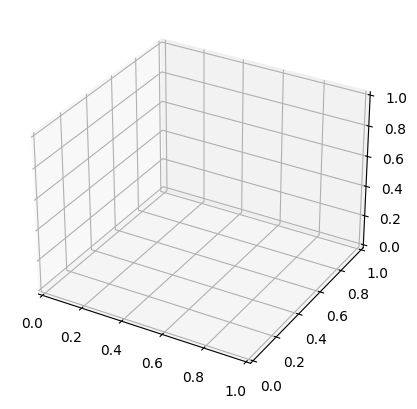

In [54]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

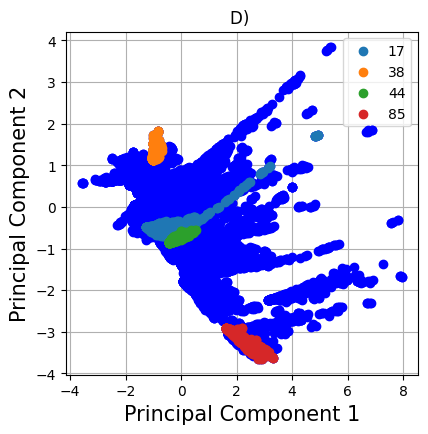

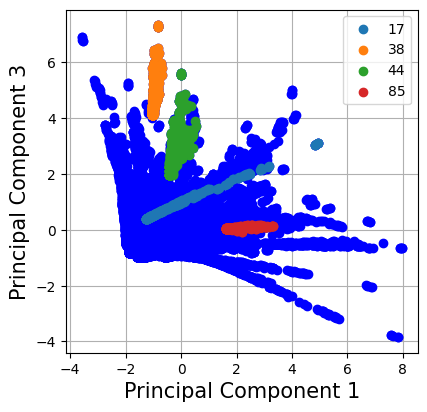

In [422]:

# Get a list of all available markers
#marker_list = list(markers.MarkerStyle.markers.keys())

outputvalsname =  ['cs','coa','cod','cca','ccd','co2', 'css2']# 'co','cc',#'cl',
takeOut =[]


selectedSets = (set( df['pSet'].unique())-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)


# Separating out the features
x = dfa[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

#marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
#markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
#markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

#for pset in range(99):

#    subset = finalDf[finalDf['pSet']==pset]
#    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
if False:
    ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           , c = subset['color'] 
           , marker= markers_map2markers_list[pSet2mark[pset]]
           )

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                c ='b',# subset['color'] ,
               alpha=1, 
           zorder=100,#label=f'{pset}',
               )
for pset in  [17,38,44,85 ]:#[15,17,21,27,38,44,85]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               )
    plt.legend()

ax.set_title(chr(ord('@')+4)+") ")
ax.grid()# the one near 30 is no 74

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2,2,2)#projection='3d') 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

for pset in selectedSets:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                c ='b',# subset['color'] ,
               alpha=1, 
           zorder=100,#label=f'{pset}',
               )
for pset in [17,38,44,85 ]:#[15,17,21,27,38,44,85]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 3'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               )
    plt.legend()

if False:
    #for pset in range(99):
    #    subset = finalDf[finalDf['pSet']==pset]
    #    if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
    if False:
        ax.scatter(finalDf[ 'principal component 1']
               , finalDf['principal component 3']

               , c = subset['color'] 
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )
            #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")

    for pset in selectedSets:
        subset = finalDf[finalDf['pSet']==pset]
        ax.scatter(subset[ 'principal component 1']
                   , subset['principal component 3'],
                    #c = subset['color'] ,
                   alpha=1, 
               zorder=100,label=f'{pset}'
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #plt.legend()

    ax.set_title(chr(ord('@')+5)+") ")
    ax.grid()# the one near 30 is no 74

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(2,2,3)#projection='3d') 

    ax.set_title(chr(ord('@')+6)+") ")
    ax.set_xlabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)

    #subset = finalDf[finalDf['pSet']==pset]
    #if ( len(subset) > 0) and (pset not in takeOut) and (pset not in selectedSets):
    if False:
        ax.scatter(finalDf[ 'principal component 2']
               , finalDf['principal component 3']
               , c = subset['color'] 
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )

    for pset in selectedSets:
        subset = finalDf[finalDf['pSet']==pset]
        ax.scatter(subset[ 'principal component 2']
                   , subset['principal component 3'],
                    #c = subset['color'] ,
                   alpha=1, 
               zorder=100,label=f'{pset}'
                   #, marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        ##plt.legend()

ax.grid()# the one near 30 is no 74
plt.show()

In [423]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.46104997 0.20477145 0.17200251] 0.8378239305171362


In [57]:
import statistics
midpc1 = statistics.median(finalDf['principal component 1'])
print(midpc1)
midpc2 = statistics.median(finalDf['principal component 2'])
print(midpc2)

-0.34791496177510595
0.11207948167406462


In [58]:
dists = []
finalDf['dists']=np.nan
for psets in selectedSets:
    subset = finalDf[finalDf['pSet']==psets]
    dist = ((subset['principal component 1']-midpc1)**2 + 
           (subset['principal component 2']-midpc2)**2)**(1/2)
    finalDf.loc[finalDf['pSet']==psets, 'dists'] = np.mean(dist)

In [59]:
print(np.nanmax(finalDf['dists']),np.nanmin(finalDf['dists']))

5.187121344435788 0.4357315895246166


In [60]:
set(finalDf[
    (finalDf['dists'] == np.nanmin(finalDf['dists']) )]['pSet'])

{8}

In [312]:
set(finalDf[
    (finalDf[
        'principal component 2'] == min(finalDf['principal component 2'])
    )]['pSet'])

{85}

In [313]:
set(finalDf[
    (finalDf[
        'principal component 3'] == min(finalDf['principal component 3'])
    )]['pSet'])

{50}

In [62]:
(set(finalDf[
    (finalDf['principal component 2'] >2.9 )]['pSet'])-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

{12, 48}

In [63]:
(set(finalDf[
    (finalDf['principal component 1'] > 8 )]['pSet'])-psetCaCxa-pSethighC- 
      pSetLowCoCc-pSethighCoCc-pSethighCoCcBis)

set()

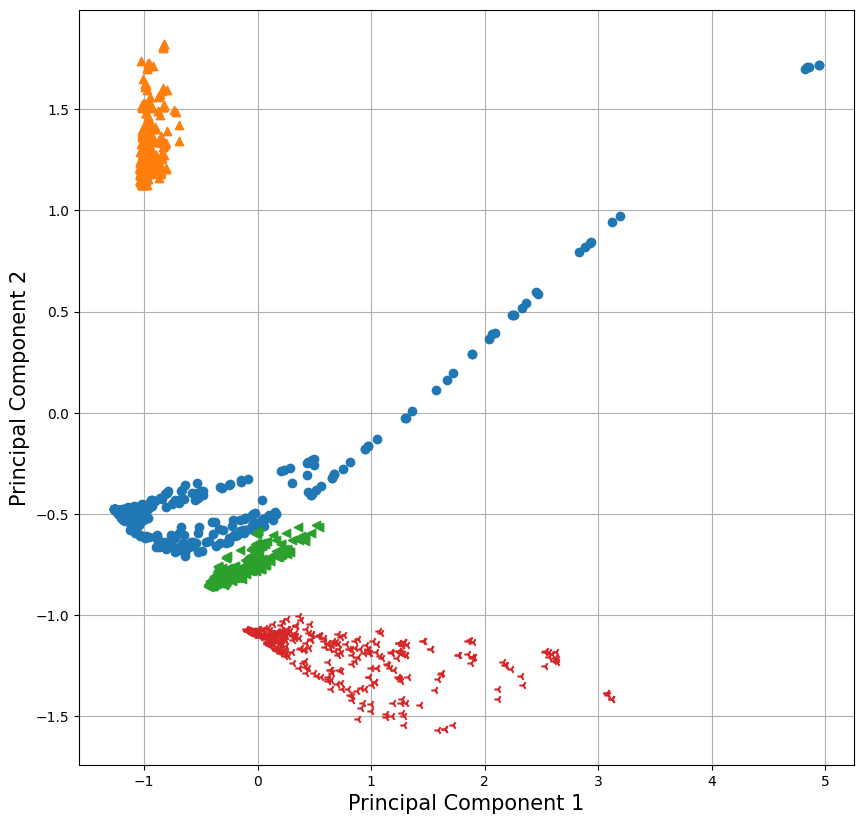

In [302]:

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
for pset in [17,38,44,73]:
    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2'],
                #c = subset['color'] ,
               alpha=1, 
           zorder=100,label=f'{pset}'
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )

ax.grid()# the one near 30 is no 74
plt.show()